## Basic Imports

In [2]:
# Basic imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [3]:
# Reading the given file and basic checks

df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls',index_col=0)
print(df.shape)
df.head(5)

(1200, 27)


,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


## Information about the Data

In [4]:
#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, E1001000 to E100998
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfa

## Checking Nan/Null Values

In [5]:
df.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

## Department wise Performance Rating

In [10]:
# plotted graph by using BarPlot
plt.figure(figsize=(11,6))
sns.(df['EmpDepartment'],df['PerformanceRating'])
plt.show()

SyntaxError: invalid syntax (<ipython-input-10-1c949daf9393>, line 3)

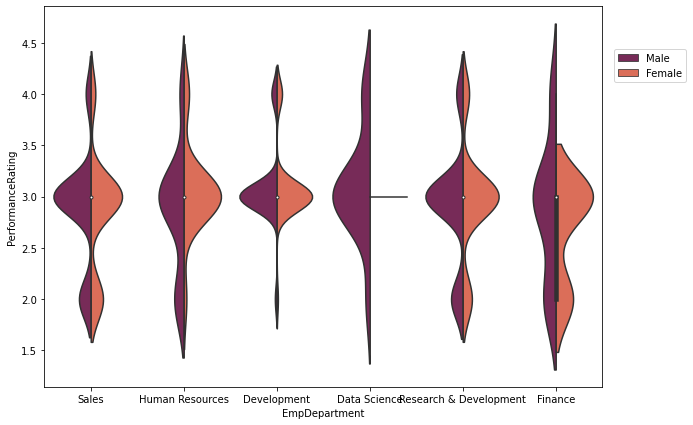

In [11]:

#plotted the graph by using violin plot
plt.rcParams["figure.figsize"]=10,7
ax = sns.violinplot(x="EmpDepartment", y="PerformanceRating" , hue="Gender",
                    data=df, palette="rocket", split=True)
plt.legend(bbox_to_anchor=(1.16, 0.9))

<AxesSubplot:xlabel='EmpDepartment'>

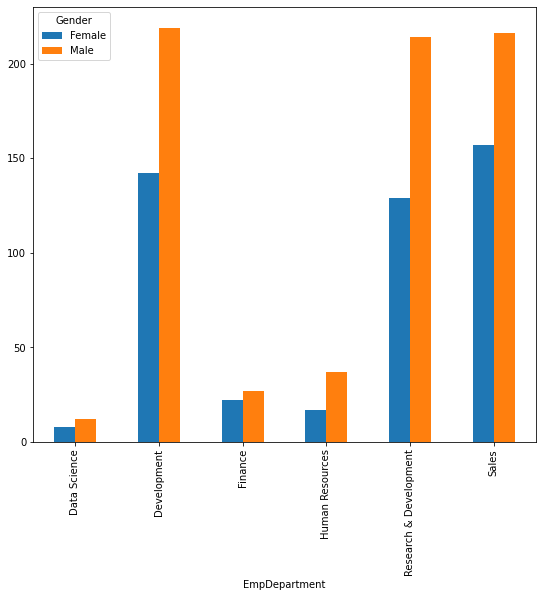

In [12]:
#plotting departmentwise Gender
plt = df.groupby("EmpDepartment").Gender.value_counts().sort_values(ascending=False)
plt.unstack().plot(kind="bar",figsize=(9,8),width=0.5)

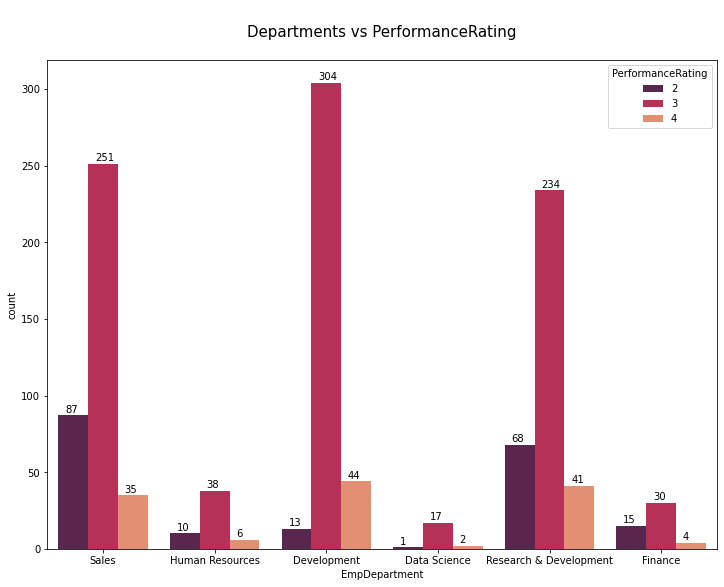

In [14]:
# plotting the graph by using countplot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
ax = sns.countplot(x=df['EmpDepartment'],hue= df["PerformanceRating"],palette='rocket')
plt.title("\nDepartments vs PerformanceRating\n",fontsize=15,color='black')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))
plt.show()


### From the above graph we can conclude that from the EmpDepartment Development dept is showing High performance rating

 <b>Sales:</b> The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female. The total work experience does not count the performance rating.

<b>Human Resources:</b> The majority of the employees lying under the level 3 performance. The older people are performing low in this department. The female employees in HR department doing really well in their performance. The total work experience does matter to performance in this department.

<b>Development:</b> The largest number of employees are level 3 performers. Employees of all age are performing at the level of 3 only. The gender-based performance is nearly same for both.

<b>Data Science:</b> The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. The age does not count as an important factor in their performance. Male employees are doing good in this department. Same like HR, the number of work experience does matter.

<b>Research & Development:</b> The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

<b>Finance:</b> The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.

In [15]:
#Percent count of EmpDepartment with performance Rating

print("\033[1m\nPercent count of EmpDepartment with Performance Rating:")
t = pd.crosstab(df["PerformanceRating"], df["EmpDepartment"], margins=True,normalize=True)
round(t.multiply(100),2)


Percent count of EmpDepartment with Performance Rating:


EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


###  Performance Rating with respect to gender

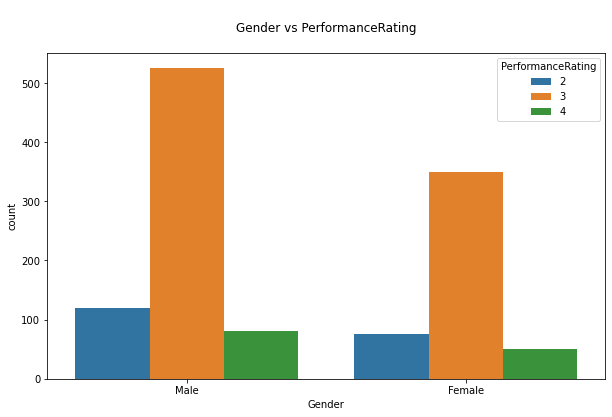

In [16]:
#Plotting the graph for gender
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x=df["Gender"],hue= df['PerformanceRating'],palette='tab10')
plt.title("\nGender vs PerformanceRating\n")
#plt.legend(bbox_to_anchor=(1.0, 0.9))
plt.show()

### The male performance rating the little bit higher compared to female.

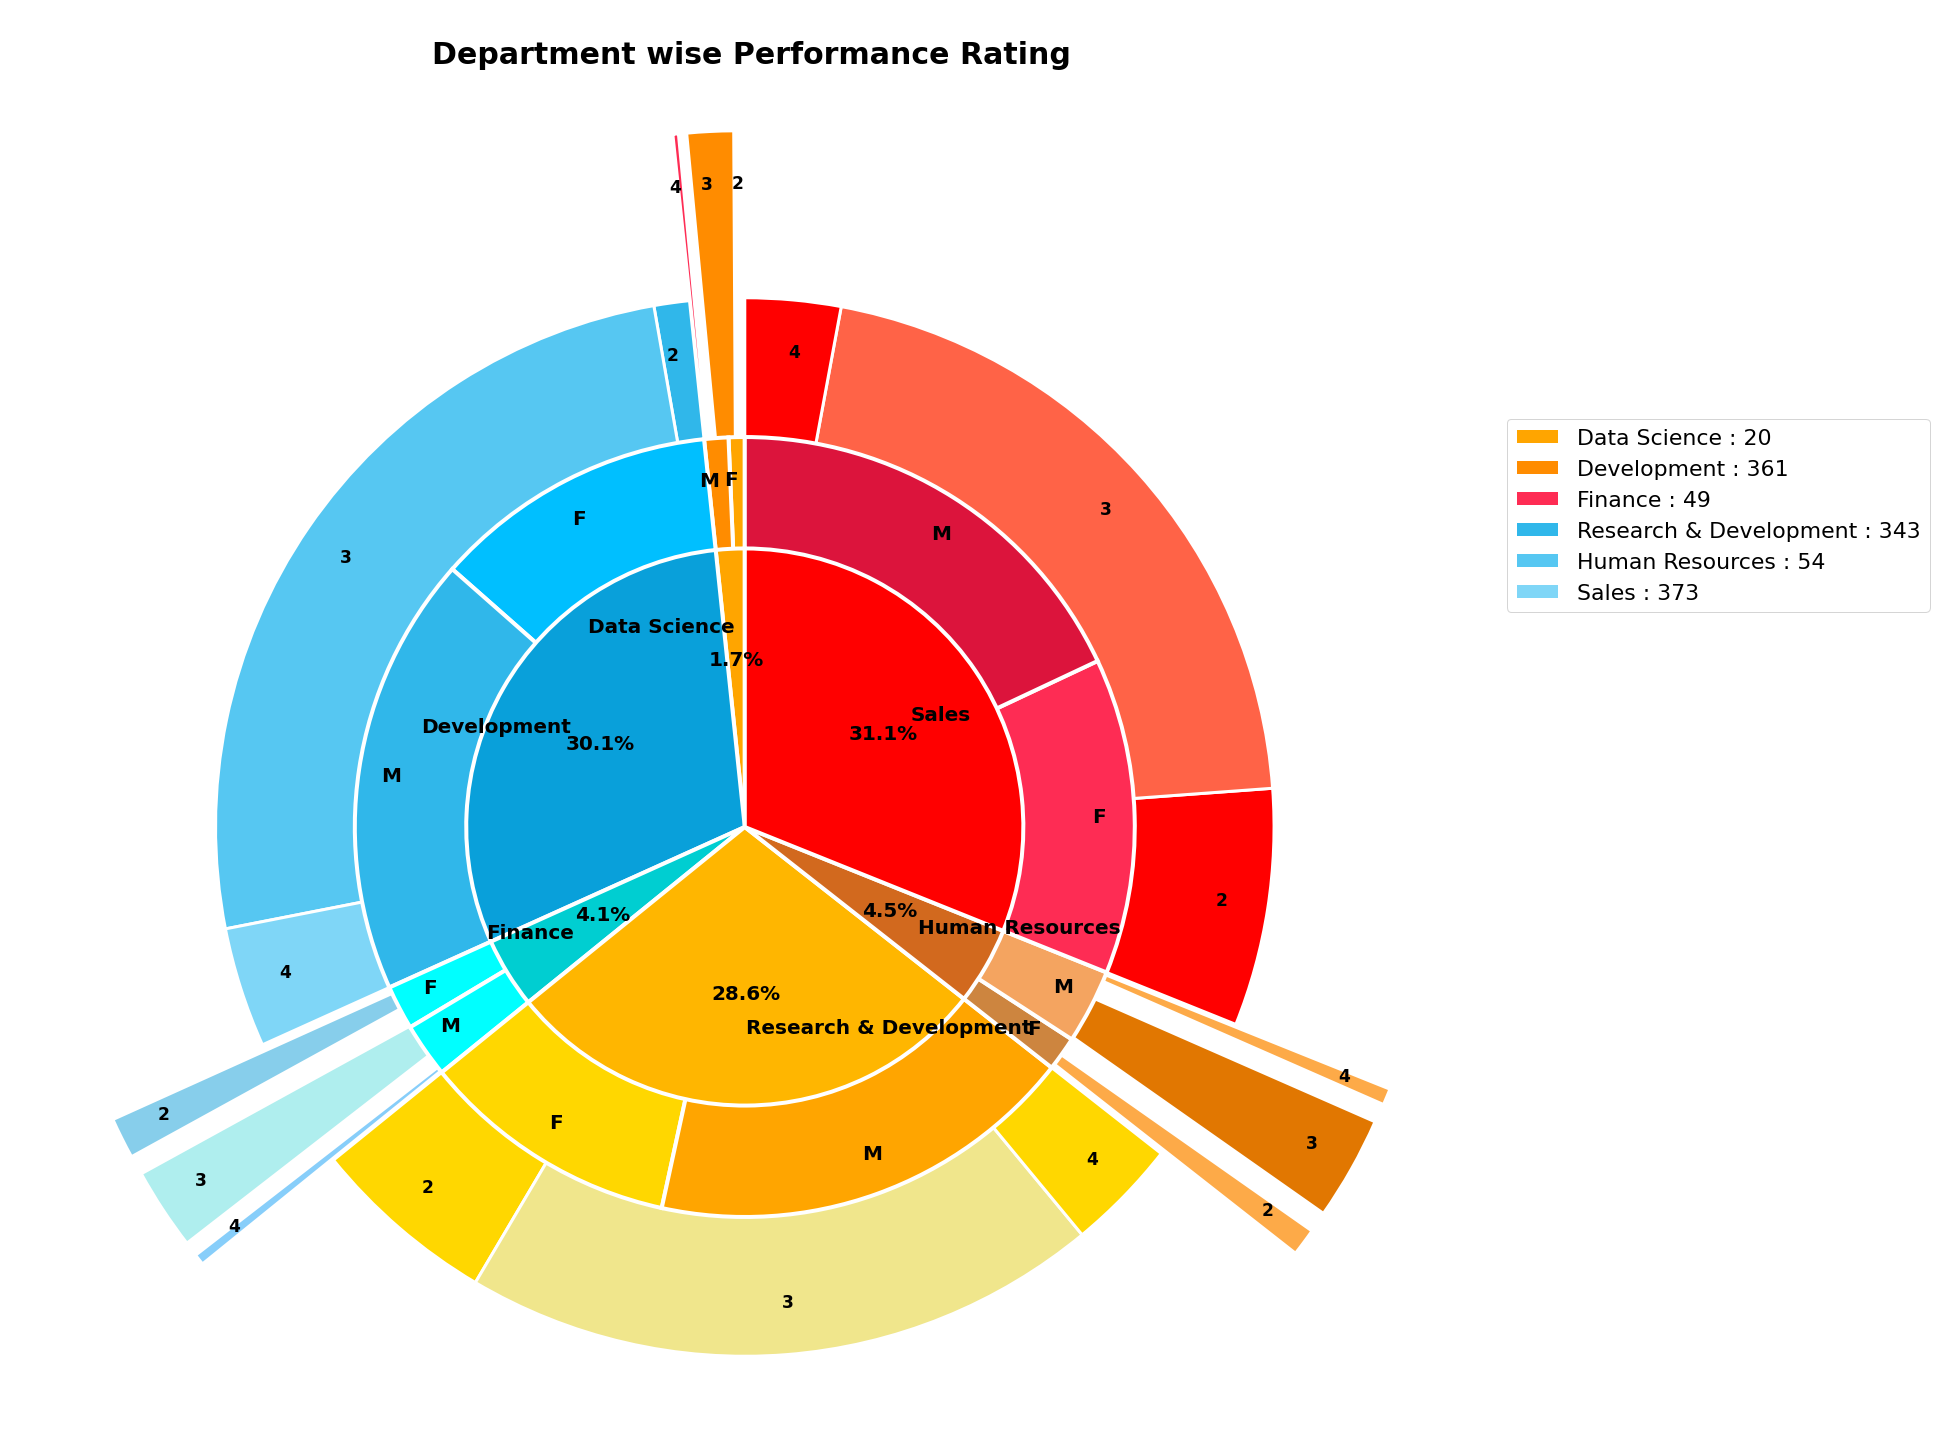

In [17]:
# plotting depatment wise performance using doughnut plot

import matplotlib.pyplot as plt
plt.figure(figsize=(27,20))
plt.title("\nDepartment wise Performance Rating",fontsize=30,fontweight="bold",color='black')
plt.pie([1,17,2,13,304,44,15,30,4,68,234,41,10,38,6,87,251,35],
                 labels=['2','3','4','2','3','4','2','3','4','2','3','4','2','3','4','2','3','4'],
                 colors=['orange', 'darkorange', 'xkcd:reddish pink',
                         '#30B7EA','#56C7F2','#7FD6F7',
                         "skyblue","paleturquoise",'lightskyblue',
                         "gold",'khaki','gold',
                         '#fdaa48',"#e17701","#fdaa48",
                         'r','tomato','r'],
                 startangle=90,labeldistance=0.9,
                 radius=0.95,explode =[0.3,0.3,0.3,0,0,0,0.3,0.3,0.3,0,0,0,0.3,0.3,0.3,0,0,0],
                 pctdistance=0.58, textprops = {"fontsize":17,"fontweight":"bold", 'color':'black'},
                 wedgeprops=dict(width=0.6, edgecolor='white',linewidth=3),
                 frame=True)
plt.pie([8,12,142,219,22,27,129,214,17,37,157,216],
        labels = ['F','M','F','M','F','M','F','M','F','M','F','M'],
        colors = ['orange', 'darkorange',
                  'deepskyblue','#30B7EA',
                  'cyan','aqua',
                  "gold","orange",
                  'peru',"sandybrown",
                  'xkcd:reddish pink','crimson'],
        radius=0.7,startangle=90,
        labeldistance=0.89,
        textprops = {'fontsize':20, "fontweight":"bold", 'color':'black'},
                  wedgeprops=dict(width=0.4, edgecolor='white', linewidth=4)
       )
plt.pie([20, 361, 49, 343,54, 373],
                  labels=['Data Science', 'Development','Finance','Research & Development','Human Resources','Sales'],
                  colors=['orange', '#09A0DA', 'darkturquoise','#FFB600', 'chocolate','red'],
                  radius=0.5,startangle=90, labeldistance=0.72,autopct='%.1f%%',
                  textprops = {'fontsize':20, "fontweight":"bold", 'color':'black'},
                  wedgeprops=dict(width=0.5, edgecolor='white', linewidth=4)
                 )
legend = plt.legend(bbox_to_anchor=(1, 0.75),
                    labels=['Data Science : 20', 'Development : 361','Finance : 49','Research & Development : 343','Human Resources : 54','Sales : 373'],
                    ncol=1,fontsize=22)
#legend.set_title("\n Departments Counts\n",prop={"size":20})

plt.axis('equal')
plt.tight_layout()

plt.show()

<b>Sales:</b> In Sales department it contains with the total percentage of 31.1% .In that, The Performace rating level 3 is more in the sales department. when compare to other performance rating level.

<b>Data Science:</b> In Data Science department it contains with the total percentage of 1.7 % . In that, The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers.

<b>Development:</b> In Development department it contains with the total percentage of 30.1% .In that,The largest number of employees are level 3 performers. Employees of all age are performing at the level of 3 only.

<b>Finance:</b> In Finance department it contains with the total percentage of 4.1 % . In that, The finance department performance is showing level 3 of high performance rating. when compare to other performances.

<b>Research & Development:</b> In Research & Development department it contains with the total percentage of 28.6 % .In that, the level 3 is showing the high performance rating

<b>Human Resources:</b> In Human Resources department it contains with the total percentage of 4.5 % . The majority of the employees lying under the level 3 performance.

## Age Analysis

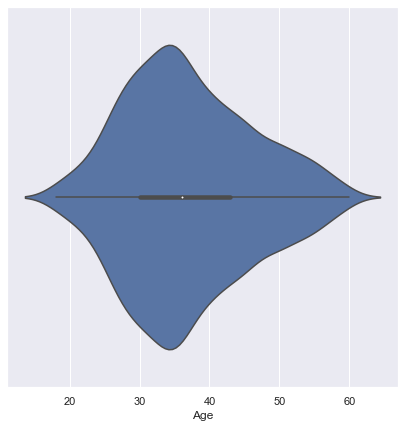

In [20]:
# showing age analysis using violin plot 
plt.figure(figsize=(7,7))
sns.set_theme(style="darkgrid")
sns.violinplot(x=df["Age"])
plt.show()

The age distribution is starting from 18 to 60 where the most of the employees are lying between 30 to 40 age count.

### Top 3 Features effecting Performance

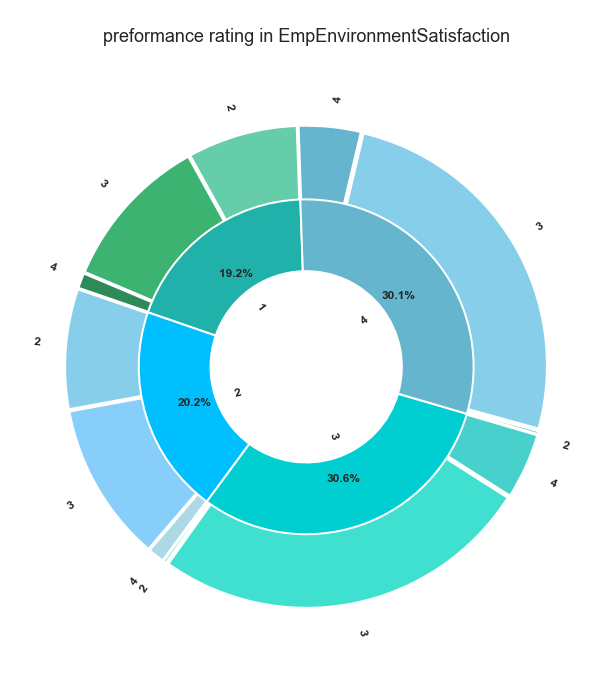

In [21]:
#To plot the graph EmpEnvironmentSatisfication vs Performance
import matplotlib.pyplot as plt
plt.figure(figsize=(20,11))
plt.title("\npreformance rating in EmpEnvironmentSatisfaction\n",fontsize=18)
plt.pie([90,127,13,98,130,14,3,310,54,3,307,51], radius=1,
        colors=["mediumaquamarine","mediumseagreen","seagreen",
                "skyblue","lightskyblue",'lightblue',
                'turquoise','turquoise','mediumturquoise',
                'c','skyblue','c',
               ],explode =[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
        labels=[2,3,4,2,3,4,2,3,4,2,3,4],rotatelabels=True,
        pctdistance=0.82, textprops = {"fontsize":12,"fontweight":"bold"},startangle=92,
        wedgeprops=dict(width=0.6, edgecolor='w',linewidth=3))

plt.pie([230,242,367,361], radius=0.7,
        colors=['lightseagreen','deepskyblue',"darkturquoise","c"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=2),textprops = {"fontsize":12,"fontweight":"bold"},
        autopct='%.1f%%',
        labels=[1,2,3,4],
        pctdistance=0.70, labeldistance=0.4, rotatelabels=True,startangle=92)
plt.show()

Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.

In [23]:
## Percent count of EmpLastSalaryHikePercent with Performance Rating

print("\033[1m\nPercent count of EmpLastSalaryHikePercent with Performance Rating:")
pd.crosstab(df["PerformanceRating"], df['EmpLastSalaryHikePercent'], margins=True)


Percent count of EmpLastSalaryHikePercent with Performance Rating:


EmpLastSalaryHikePercent,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,All
PerformanceRating,,,,,,,,,,,,,,,,
2,28,30,27,28,11,12,9,10,10,9,4,7,4,2,3,194
3,140,123,138,140,67,54,55,63,51,14,6,13,2,5,3,874
4,1,2,3,4,4,2,3,0,2,27,24,27,15,11,7,132
All,169,155,168,172,82,68,67,73,63,50,34,47,21,18,13,1200


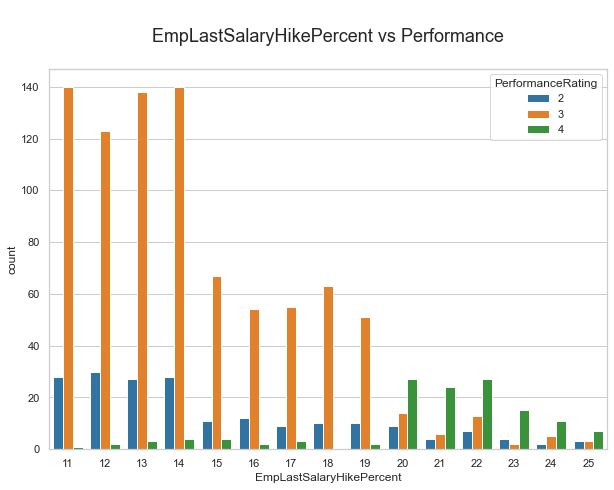

In [24]:
## To plot the graph EmpLastSalaryHikePercent vs Performance 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.countplot(x=df['EmpLastSalaryHikePercent'],hue= df["PerformanceRating"],palette='tab10')
plt.title("\nEmpLastSalaryHikePercent vs Performance\n",fontsize=18)
plt.show()

#### From the above graph, we can conclude that

* More Number of Employees whose salary hike percentage belongs to 11-14 % are getting high performance rating.
* Employees whose salary hike percentage is in between 20-22%, There performance rating is 4
* Number of Employees belongs to 15-19% are moderate in number while employees belongs to 20-25% salary hike percent are in less in number.

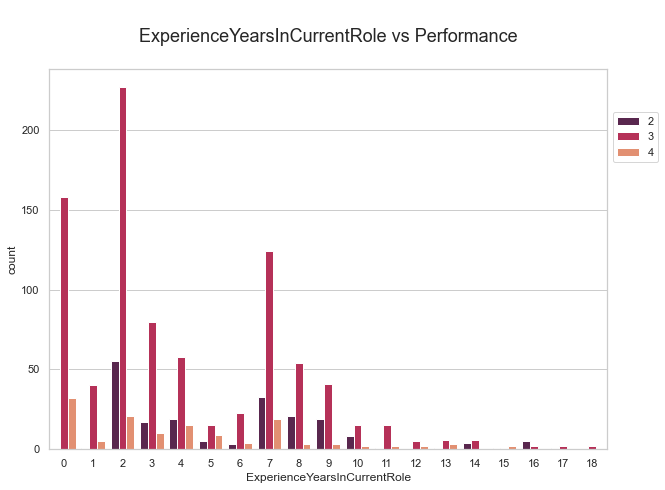

In [25]:
## To plot the graph ExperienceYearsInCurrentRole vs Performance 

plt.figure(figsize=(10,7))
ax = sns.countplot(x=df['ExperienceYearsInCurrentRole'],hue= df["PerformanceRating"],palette='rocket')
plt.title("\nExperienceYearsInCurrentRole vs Performance\n",fontsize=18)
plt.legend(bbox_to_anchor=(1.0, 0.9))
plt.show()

* In given dataset,more number of employees have 2 years of experience for current role. which gives good performance rating.
* Employees which have more than 9 year of experience are less in number & their performance is not so good for current role.
* Employees which is fresher are moderate in number and their performance rating is seems to be good.

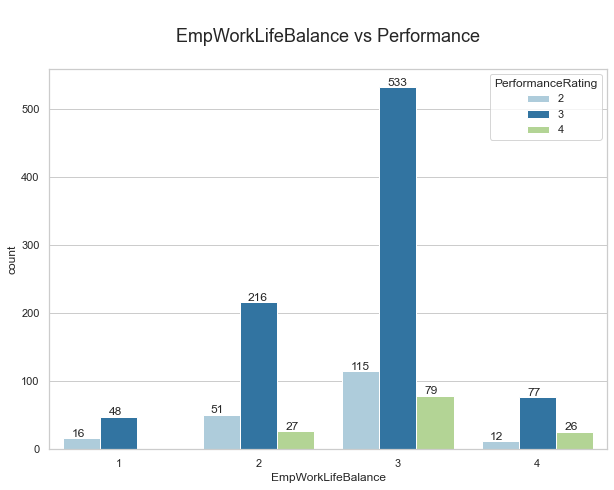

In [26]:

## To plot the graph EmpWorkLifeBalance vs Performance

plt.figure(figsize=(10,7))
ax = sns.countplot(x=df['EmpWorkLifeBalance'],hue= df["PerformanceRating"],palette='Paired')
plt.title("\nEmpWorkLifeBalance vs Performance\n",fontsize=18)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))
plt.show()

* In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees
* In given datastet, level 1 & level 4 employees are less in number.


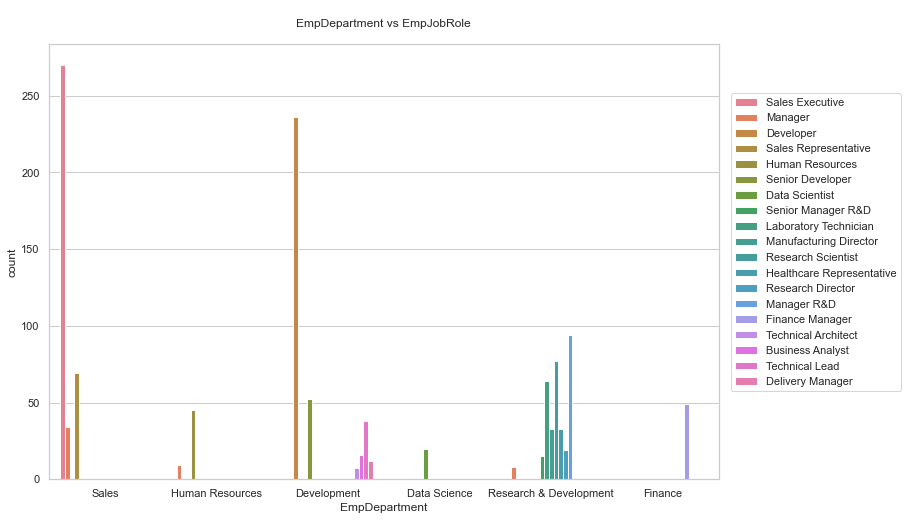

In [27]:
## To visualize the relationship between EmpDepartment vs EmpjobRole

plt.figure(figsize=(12,8))
sns.countplot(x=df["EmpDepartment"],hue= df['EmpJobRole'],palette='husl')
plt.title("\nEmpDepartment vs EmpJobRole\n")
plt.legend(bbox_to_anchor=(1.01, 0.9))
plt.show()

EmpDepartment is highly correlated with EmpJobRole

In [28]:
# Percent count of Gender with MaritalStatus

print("\033[1m\nPercent count of Gender with MaritalStatus:")
pd.crosstab(df["MaritalStatus"], df["Gender"], margins=True)


Percent count of Gender with MaritalStatus:


Gender,Female,Male,All
MaritalStatus,,,
Divorced,98,170,268
Married,215,333,548
Single,162,222,384
All,475,725,1200


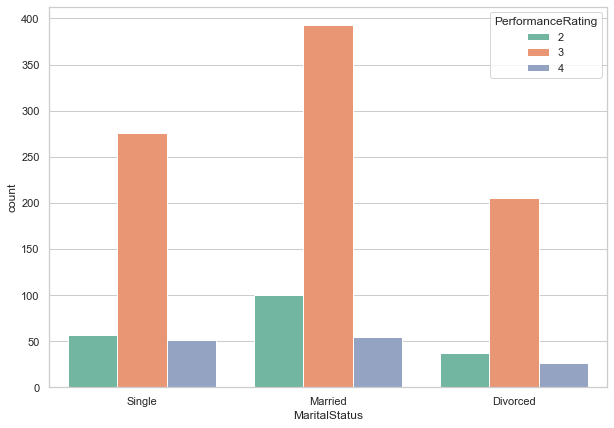

In [30]:
## Plotting the graph for Marital Status

plt.figure(figsize=(10,7))
ax = sns.countplot(x=df['MaritalStatus'],hue= df["PerformanceRating"],palette='Set2')

* Married, Single & Divorced employees gives good performance rating.
* In given dataset, married employees are more in number after that Single & Divorced employees.

In [31]:
#To check the columns present

df.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [32]:
# To visualize the performance rating in all numerical features

num_cols = df.loc[:,['EmpEducationLevel','EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction','EmpRelationshipSatisfaction',
       'TrainingTimesLastYear','EmpWorkLifeBalance']]


                                                       Performance Rating                                                       



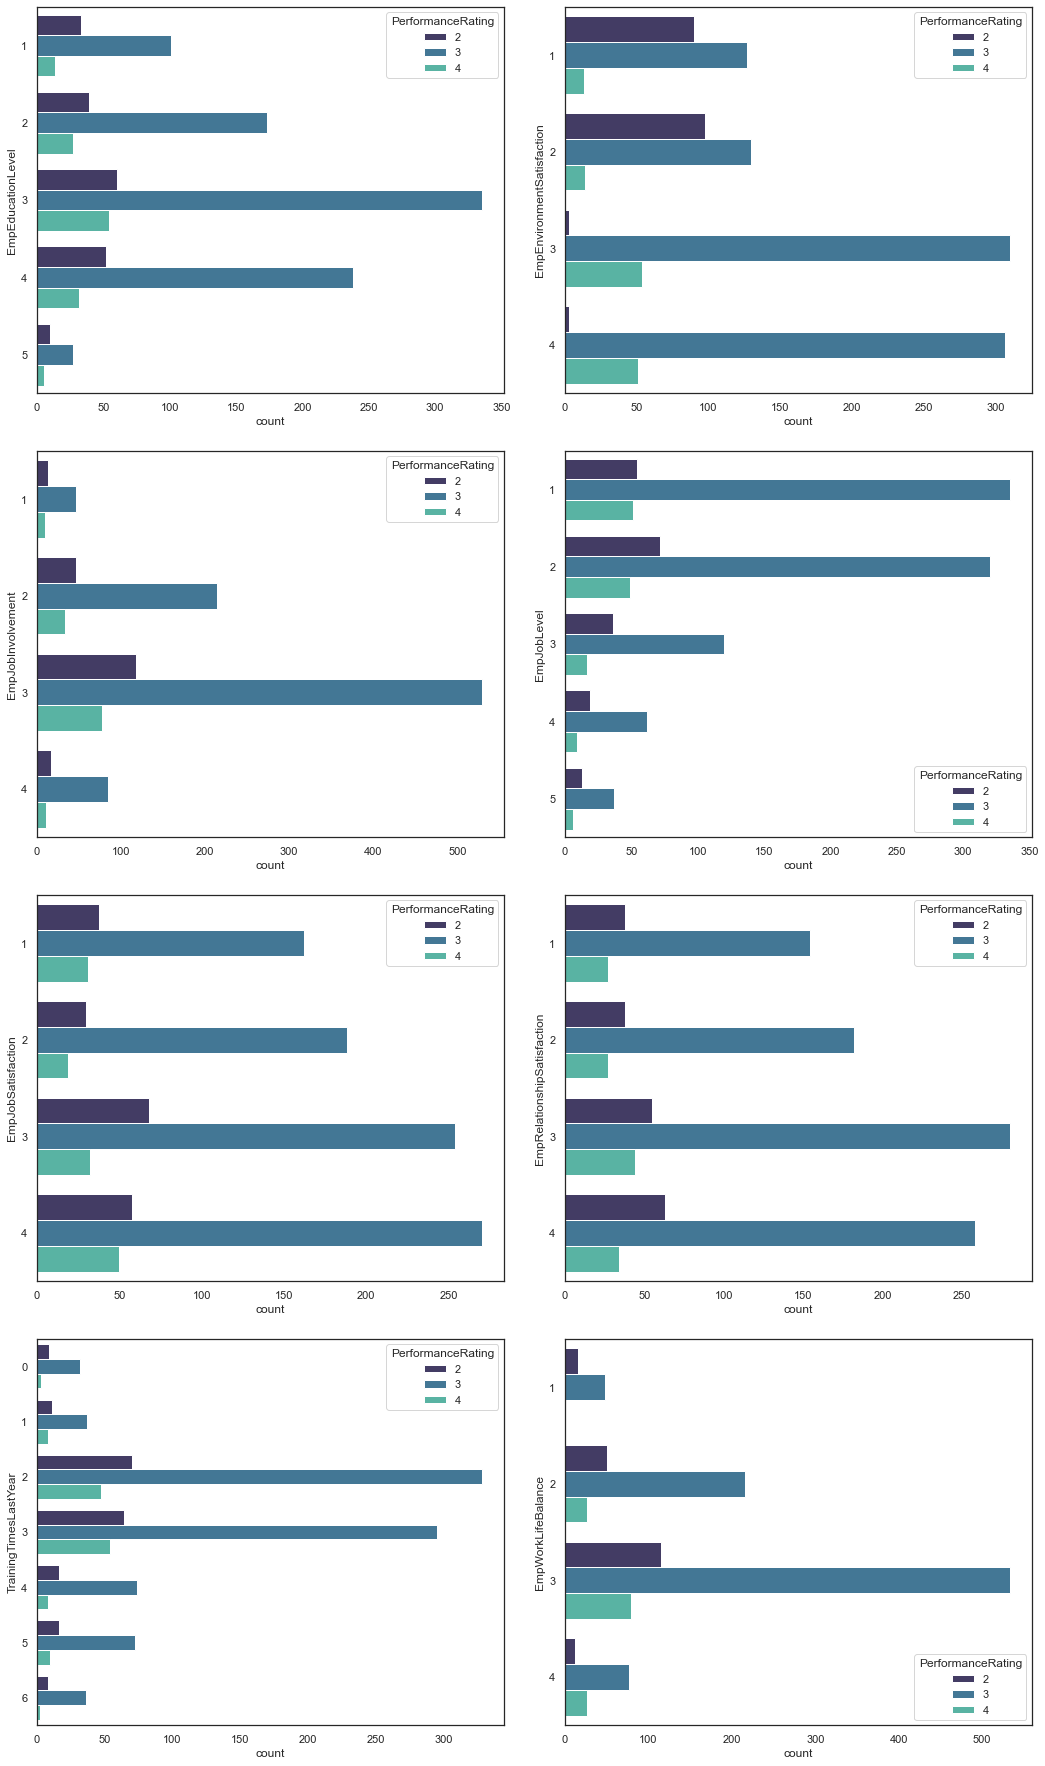

In [35]:
# To plot the Performance Rating of all numerical Features

fig = plt.figure(figsize=(15,25))

txt = "Performance Rating"
x = txt.center(128)
print(f"\033[1m\n{x}\n")
sns.set_style("white")
for index in range(len(num_cols.columns)):
    plt.subplot(4,2,index+1)
    sns.countplot( y =num_cols.iloc[:,index],hue=df["PerformanceRating"],palette='mako')
fig.tight_layout(pad=2)

### From the above plots, we get following insights:
* The age distribution is starting from 18 to 60 where the most of the employees are lying between 30 to 40 age count
* Employees are worked in the multiple companies up to 8 companies where most of the employees worked up to 2 companies before getting to work here.
* The hourly rate range is 65 to 95 for majority employees work in this company.
* In General, Most of Employees work up to 5 years in this company. Most of the employees get 11% to 15% of salary hike in this company.

In [36]:
# For analysing the object type data

obj_cols  = df.select_dtypes(include="object")
obj_cols.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')


                                               Analysis for Categorical type data                                               



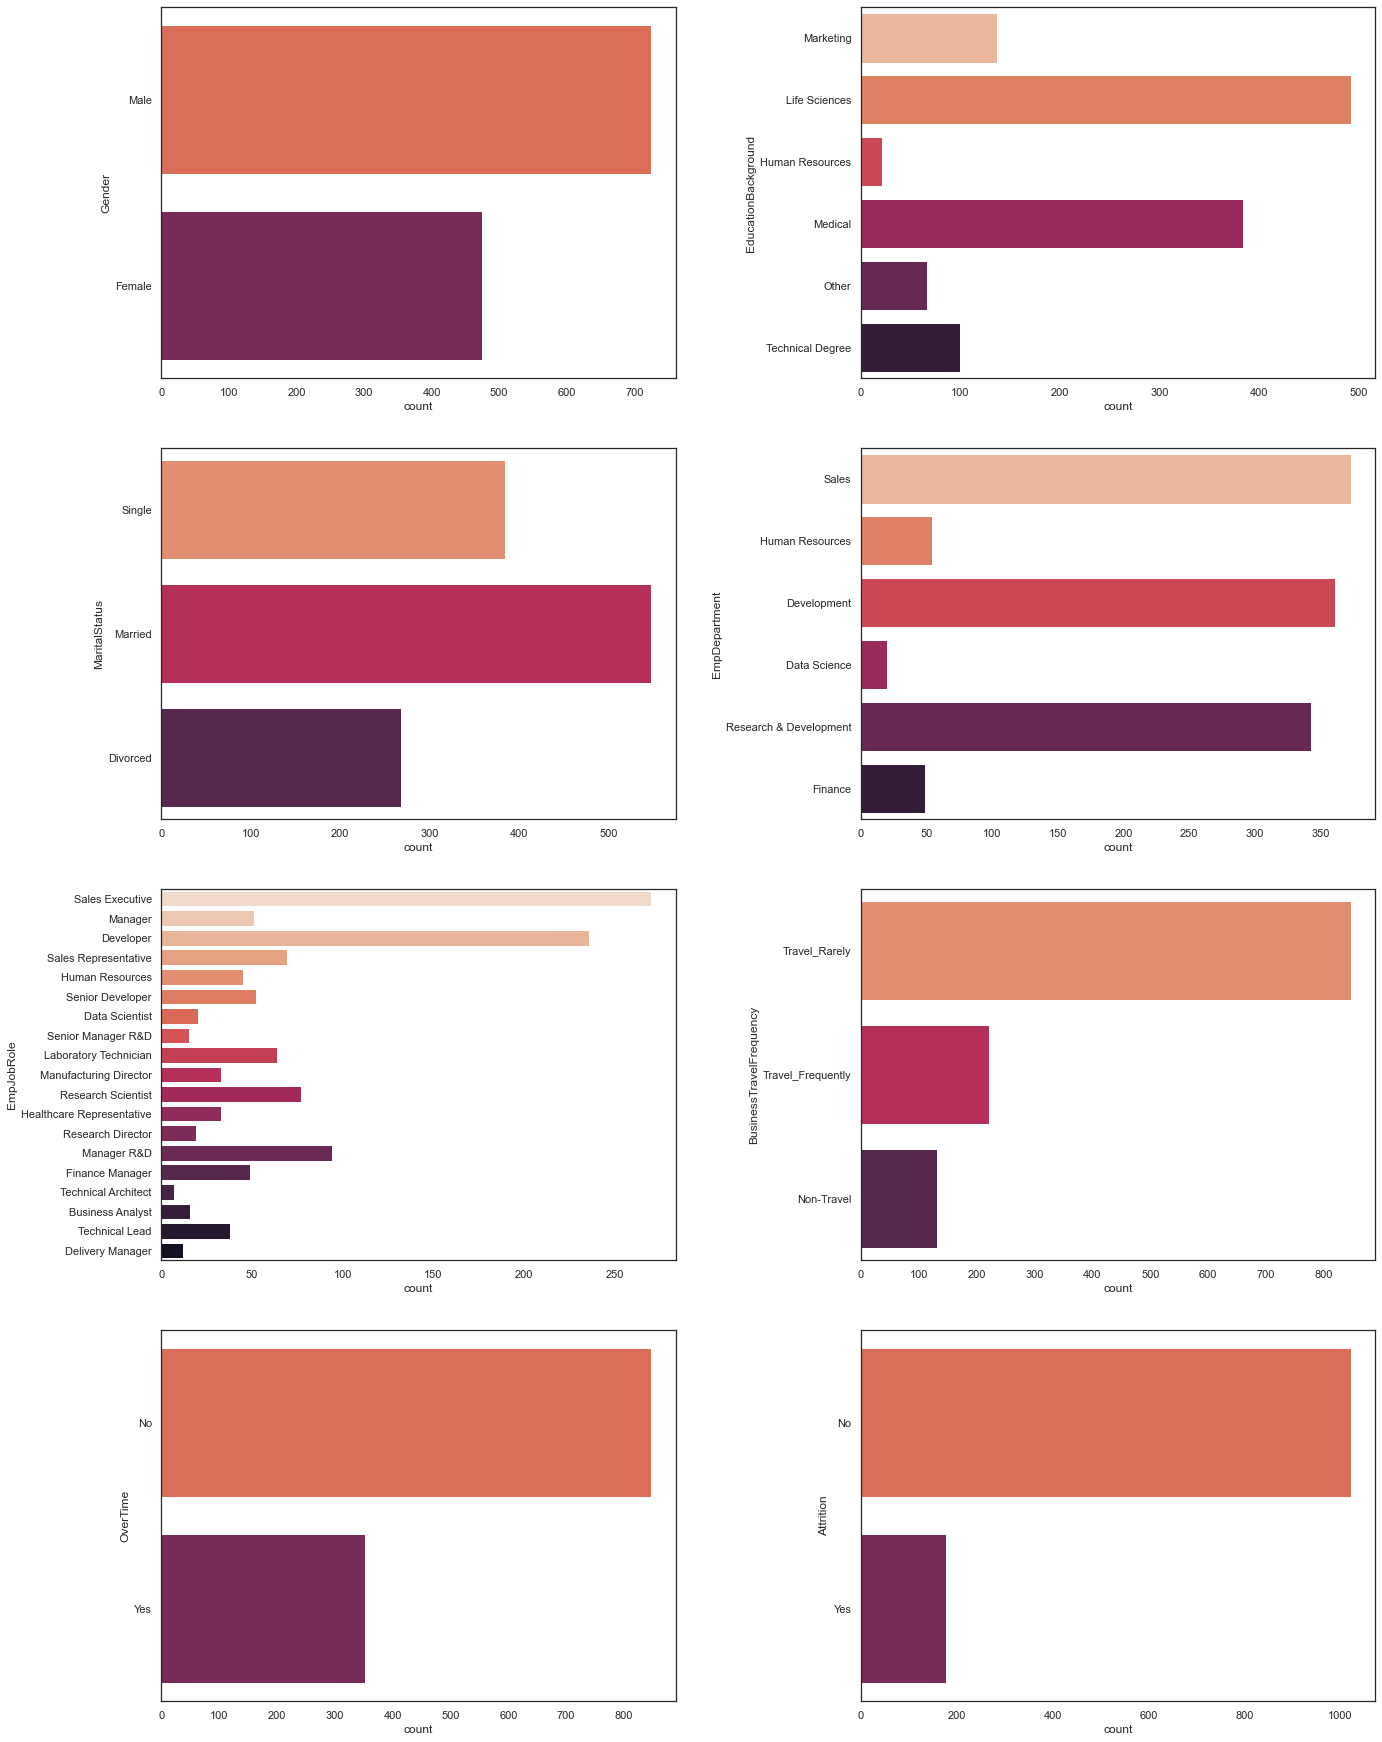

In [37]:
# Analysis for object type data

fig = plt.figure(figsize=(20,25))

txt = "Analysis for Categorical type data"
x = txt.center(128)
print(f"\033[1m\n{x}\n")
sns.set_style("white")
for index in range(len(obj_cols.columns)):
    plt.subplot(4,2,index+1)
    sns.countplot( y =obj_cols.iloc[:,index],palette='rocket_r')
fig.tight_layout(pad=3)

### From the above plots, we get following insights:
* The Gender variance is divided by 60% of Male employees and 40% of Female employees in the company.
* The number of the educational backgrounds present in the employees is six unique backgrounds.
* Nineteen unique employee job roles are present in this company.
* The most of the employees are having the education level of 3
* The Job satisfaction level in this company is high level for the majority of employees.
* The 85% of employees are not having attrition in their work
* Only 11% of employees in the company were achieved level 4 - performance rating
* The overall percentage of employees doing overtime is 30%